<a href="https://colab.research.google.com/github/lmendezayl/uba-ldd-tp1/blob/main/TP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo:**
Walter Franzphierre Yance Velarde

In [197]:
# Si requieren mas librerias, pueden importarlas aca
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import json
import plotly.express as px
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Si no existe root_mean_squared_error, quitarlo o actualizar scikit-learn con el comando
#!pip install scikit-learn --upgrade

In [198]:
import os
os.getcwd()

'/home/walter/proyectos/jupyter_env'

Trabajaremos con el dataset `indicadores-proceso-trayectoria-sobreedad-2012_2022.csv1` que
contiene mediciones de variables educativas de la escuela primaria y secundaria en la Provincia de Buenos Aires (PBA) desde 2012 a 2022. En este [link](https://abc.gob.ar/secretarias/sites/default/files/2021-08/MANUAL%20METODOLÓGICO%20DE%20INDICADORES%20EDUCATIVOS-%202021.pdf) pueden consultar la descripción de cada variable.

In [199]:
df_educacion = pd.read_csv('indicadores-proceso-trayectoria-sobreedad-2012_2022.csv')
df_educacion.head()

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,1.45,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.70,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.69,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,1.47,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,1.58,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24


### Visualización con datos geográficos
El objetivo de esta parte del TP es visualizar datos sobre un mapa de Buenos Aires. Para esto, utilizaremos las librerías `geopandas`, que nos permite trabajar con un .geojson como si fuera un DataFrame de `pandas`, y `plotly` para generar mapas interactivos

#### Ejercicio 1
Cargar los datos de `partidos.geojson` utilizando `geopandas`:



In [200]:
# Cargamos el archivo json cpn los datos
df_geo = gpd.read_file('partidos.geojson')
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,06357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,06441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,06427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,06260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,06560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
138,132,06412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."
139,314,06126,Partido de Islas Campana,Partido,Islas Campana,ARBA,682.96,NaN,"MULTIPOLYGON (((-58.9 -33.96, -58.9 -33.96, -5..."
140,113,06182,Partido de Coronel Rosales,Partido,Coronel Rosales,ARBA,1283.36,1622.60,"MULTIPOLYGON (((-61.74 -38.63, -61.74 -38.63, ..."
141,357,06805,Partido de Islas Tigre,Partido,Islas Tigre,ARBA,280.36,NaN,"MULTIPOLYGON (((-58.65 -34.27, -58.64 -34.27, ..."



Si imprimimos `geo_df` observamos que cada fila corresponde a un municipio con distintas
características y, además, hay una columna `geometry` que tiene las coordenadas de los límites de los partidos. Pueden visualizar estos datos con `geo_df.plot()`.

<Axes: >

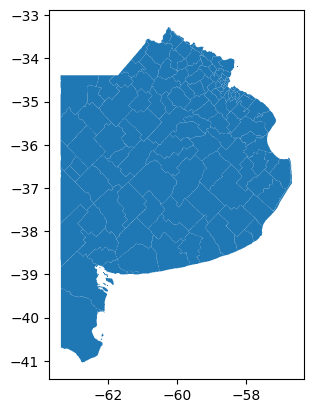

In [201]:
# Visualizamos los datos como Partidos
df_geo.plot()

#### Ejercicio 2
Identificar qué columna se corresponde al número de identificación de cada municipio. Mostrar
todos los municipios con números de identificación repetidos.
**Sugerencia**: utilizar el argumento `keep` del método `duplicated`

Hacemos uso del metodo `.nunique()` a la Serie `df_geo['nam']`  (diremos que nam correspondiente a la columna de los municipios, aunque tambien podria haber sido la columna `fna` pues sus valores unicamnete se diferencian porque estas comienzan con "Partido de") obteniendo 143, esto coincide con el numero de filas del DataFrame df_geo. Por esa razón para ubicar cual es la columna con los numeros de identificacion con valores repetidos, a esa dicha Serie `"df_geo['__']"` al aplicar `.nunique()` debo obtener un valor `menor a 143`.

Observamos que la columna buscada no puede ser gna ni sag porque son columnas con valor unico para las 143 filas. Tampoco la columnasarl porque aunque `df_geo['arl'].nunique() resulte 135`, tengo que al obtener otro DataFrame con los valores repetidos con `geo_df[geo_df['arl'].duplicated()]` , son todos de valor nulo (NaN) que no es un identificador (y aunque lo fuera tiene asignados municipios todos diferentes que comienzan en `Islas` (dato que lo veremos en adelante). Por ultimo la columna `ara3` no puede ser tampoco pues ademas que contiene tambien valores float como con arl (no son valores usual que funcionen como identificar),`df_geo['ara3'].nunique() resulta 143` y por lo tanto no hay repeticiones.Por otro lado la columna geometry es muy evidente que no lo sera.

`Finalmente` comparamos resultados de aplicar metodo .nunique() para las seies correspondientes a columnas `cca` y `cde` pues sus valores son de tipo string pues comienzan en 0 (forma habitual de asignar un identificador). Asi df_geo['cca'].nunique() resulto en 143 mientras que `df_geo['cde'].nunique() en 134` y por lo tanto es la columna que buscabamos pues encontramos que tiene valores repetidos de los numeros de identificación.


In [202]:
df_geo['cca'].nunique()

143

In [203]:
df_geo['cde'].nunique()

134

Siguiendo la sugerencia uso el metodo `.duplicated(keep="first") y .duplicated(keep='last')` y me doy cuenta que solo hubo una repeticion para cada valor repetido de la columna cde y eso porque los municipios que comienzan con la palabra Islas son las mismas que las que no. Para ver esto genero un nuevo DataFrame `df_municipiosRepetidos` con los valores de cde repetidos mediante metodo .concat() y para visualizar aquel df, los ordeno gracias al metodo `.sort_values()`. Además podemos apreciar que en la Serie `df_municipiosRepetidos.set_index("cde")['nam']` podemos ver que ademas de la diferencia de la palabra Islas que era evidente a simple vista, tambien tenemos que los municipios de Chascomus y Lezama presentan los mismos identificador `06217`, asunto que pareceria un error en el Dataframe.

In [204]:
gdf1= geo_df[geo_df['cde'].duplicated(keep='first')]
gdf2= geo_df[geo_df['cde'].duplicated(keep='last')]
df_municipiosRepetidos = pd.concat([gdf1, gdf2], axis=0).sort_values("cde")
display(df_municipiosRepetidos)
df_municipiosRepetidos.set_index("cde")['nam']

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
126,309,06070,Partido de Islas Baradero,Partido,Islas Baradero,ARBA,365.56,NaN,"MULTIPOLYGON (((-59.48 -33.66, -59.48 -33.67, ..."
65,009,06070,Partido de Baradero,Partido,Baradero,ARBA,1142.10,1591.87,"MULTIPOLYGON (((-59.56 -33.77, -59.56 -33.77, ..."
139,314,06126,Partido de Islas Campana,Partido,Islas Campana,ARBA,682.96,NaN,"MULTIPOLYGON (((-58.9 -33.96, -58.9 -33.96, -5..."
38,014,06126,Partido de Campana,Partido,Campana,ARBA,302.83,954.54,"MULTIPOLYGON (((-59.1 -34.2, -59.09 -34.19, -5..."
130,387,06665,Partido de Islas Ramallo,Partido,Islas Ramallo,ARBA,89.97,NaN,"MULTIPOLYGON (((-59.82 -33.58, -59.82 -33.58, ..."
28,087,06665,Partido de Ramallo,Partido,Ramallo,ARBA,981.08,951.51,"MULTIPOLYGON (((-60.2 -33.54, -60.2 -33.54, -6..."
128,396,06749,Partido de Islas San Fernando,Partido,Islas San Fernando,ARBA,1033.72,NaN,"MULTIPOLYGON (((-58.45 -34, -58.43 -34, -58.4 ..."
103,096,06749,Partido de San Fernando,Partido,San Fernando,ARBA,24.05,877.08,"MULTIPOLYGON (((-58.56 -34.42, -58.56 -34.42, ..."
142,398,06763,Partido de Islas de San Nicolas,Partido,Islas de San Nicolas,ARBA,16.47,NaN,"MULTIPOLYGON (((-60.26 -33.27, -60.25 -33.27, ..."
29,098,06763,Partido de San Nicolás,Partido,San Nicolás,ARBA,656.15,652.26,"MULTIPOLYGON (((-60.27 -33.26, -60.27 -33.26, ..."


cde
06070          Islas Baradero
06070                Baradero
06126           Islas Campana
06126                 Campana
06665           Islas Ramallo
06665                 Ramallo
06749      Islas San Fernando
06749            San Fernando
06763    Islas de San Nicolas
06763             San Nicolás
06770         Islas San Pedro
06770               San Pedro
06805             Islas Tigre
06805                   Tigre
06882         Islas de Zárate
06882                  Zárate
Name: nam, dtype: object

#### Ejercicio 3
Aplicar las siguientes modificaciones a `geo_df`:
1. eliminar las filas que correspondan a islas de partidos (por ejemplo, Islas Ramallo).
2. convertir la columna `cde` a numérica (recordar el método `astype`)
3. corregir los valores en la columna cde para los partidos de Chascomús y Lezama, para
que coincidan con sus valores en la columna `municipio_id` de `df_educacion`. **Sugerencia**: puede basarse en el siguiente código para corregir los valores:

`geo_df.loc[geo_df[???] == ???, <columna a modificar>] = ???`

Finalmente, exportar `geo_df` como un GeoJSON llamado `partidos_limpio.geojson`:

3.1- Para eliminar filas debo reescribir el DataFrame `df_geo` y hago uso del metodo `.apply()` a la columna `'nam'` para con una con una funcion `lambda` obtener las que no comienzan con Islas `not(n.startswith("Islas"))` , asi obtengo una Serie que boleanos que `sin_Islas` que enlazare a dataflame original para asi quitarme a los que comiencen con `Islas` quedandome asi con 135 filas que son las que casi tienen identificadores no repetidos por no ser por el caso del municipio de `Chascomus y Lezama`.

In [170]:
sin_Islas= df_geo['nam'].apply(lambda n: not(n.startswith("Islas")))
sin_Islas

0       True
1       True
2       True
3       True
4       True
       ...  
138     True
139    False
140     True
141    False
142    False
Name: nam, Length: 143, dtype: bool

In [171]:
df_geo = df_geo[sin_Islas]
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,06357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,06441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,06427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,06260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,06560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
135,137,06217,Partido de Lezama,Partido,Lezama,ARBA,1044.82,1035.39,"MULTIPOLYGON (((-57.86 -35.69, -57.86 -35.69, ..."
136,127,06847,Partido de Tres Lomas,Partido,Tres Lomas,ARBA,1255.10,1262.45,"MULTIPOLYGON (((-62.94 -36.25, -62.94 -36.25, ..."
137,108,06833,Partido de Tres Arroyos,Partido,Tres Arroyos,ARBA,5935.60,5962.88,"MULTIPOLYGON (((-60.68 -38.09, -60.67 -38.1, -..."
138,132,06412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."


3.2- Para convertir la columna cde a numérica nuevamente debo sobreescribir el Dataframe `df_geo`, para ello modificaremos la columna `cde` pues con ayuda del metodo `.astype()` convertimos los valores de la columna cde a int mediante `df_geo['cde'].astype(int)`. Asi, luego, rescribimos la Serie `df_geo['cde']` con la modificada que llamamos `cde_str_a_int` mediante el metodo `.loc[:,'___']`

In [172]:
cde_str_a_int = df_geo['cde'].astype(int)
df_geo.loc[:,'cde'] = cde_str_a_int
df_geo

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,045,6357,Partido de General Pueyrredón,Partido,General Pueyrredón,ARBA,1463.50,1460.74,"MULTIPOLYGON (((-57.54 -38.06, -57.53 -38.05, ..."
1,055,6441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((-58.14 -34.99, -58.13 -35, -58..."
2,070,6427,Partido de La Matanza,Partido,La Matanza,ARBA,328.19,329.22,"MULTIPOLYGON (((-58.58 -34.65, -58.58 -34.65, ..."
3,030,6260,Partido de Esteban Echeverría,Partido,Esteban Echeverría,ARBA,120.45,120.22,"MULTIPOLYGON (((-58.51 -34.73, -58.51 -34.73, ..."
4,074,6560,Partido de Moreno,Partido,Moreno,ARBA,186.05,186.13,"MULTIPOLYGON (((-58.78 -34.56, -58.77 -34.56, ..."
...,...,...,...,...,...,...,...,...,...
135,137,6217,Partido de Lezama,Partido,Lezama,ARBA,1044.82,1035.39,"MULTIPOLYGON (((-57.86 -35.69, -57.86 -35.69, ..."
136,127,6847,Partido de Tres Lomas,Partido,Tres Lomas,ARBA,1255.10,1262.45,"MULTIPOLYGON (((-62.94 -36.25, -62.94 -36.25, ..."
137,108,6833,Partido de Tres Arroyos,Partido,Tres Arroyos,ARBA,5935.60,5962.88,"MULTIPOLYGON (((-60.68 -38.09, -60.67 -38.1, -..."
138,132,6412,Partido de José C. Paz,Partido,José C. Paz,ARBA,50.01,50.16,"MULTIPOLYGON (((-58.81 -34.48, -58.81 -34.48, ..."


3.3- para ello hacemos uso de la sugerencia. Antes averiguamos cual es el valor municipio_id para el municipio de Lezama como para el de Chascomus. Pare ello ubico el valor unico de `municipio_id` son metodo `.unique()` en el DataFrame `df_educacion` que filtre por el nombre del municipio Lezama y Chascomus obteniendo que dichos identificadores son `6466` (ubicado por pirmera vez en indice 770 de dicho df) y `6218`(ubicado por pirmera vez en indice 253, esto me servira cuando deba hacer uso del metodo `.loc[])`) respectivamente. Podria reemplazar estos valores directamente por los valores cde en el Dataframe df_geo pero usaremos la `sugerencia`

In [140]:
df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].unique()[0]

np.int64(6466)

In [141]:
df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].loc[770]

np.int64(6466)

In [142]:
df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].unique()[0]

np.int64(6218)

In [143]:
df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].loc[253]

np.int64(6218)

siguiendo la sugerencia:
`geo_df.loc[geo_df[???] == ???, <columna a modificar>] = ???`
podria usar para el reemplazo el metodo `.loc[]` o el `.unique()[0]`  porque obtengo los mismos valores como se aprecia arriba.

In [144]:
df_geo.loc[df_geo["nam"] == 'Chascomus', "cde"] = df_educacion[df_educacion['municipio_nombre'] == 'Chascomus']['municipio_id'].loc[253]
df_geo.loc[df_geo["nam"] == 'Lezama', "cde"] = df_educacion[df_educacion['municipio_nombre'] == 'Lezama']['municipio_id'].loc[770]


In [206]:
df_geo[df_geo["nam"] == 'Chascomus']

,cca,cde,fna,gna,nam,sag,ara3,arl,geometry


In [ ]:
# Grabamos los datos limpios en un nuevo archivo GeoJSON
geo_df.to_file('partidos_limpio.geojson', driver='GeoJSON')

#### Ejercicio 4
A partir del DataFrame `df_educacion`, crear un DataFrame `repit` que tenga tres colum-
nas: `cde` con el código del municipio, `municipio_nombre` con el nombre del municipio y
`repitencia_secundaria` con el promedio de repitencia en secundaria del municipio.

**Sugerencia**: Partir de `df_educacion.groupby(['municipio_id', 'municipio_nombre'])`.
Si obtienen una serie con multi-indices, pueden convertirlo a DataFrame con columnas para los índices utilizando `.reset_index()`. O si ingresan el nombre de la columna `repitencia_secundaria` entre doble corchetes, obtienen también un DataFrame con las tres columnas

In [ ]:
# Creamos un DataFrame repit con los datos de repitencia siguiendo la consigna del TP

#repit = pd.concat([df_educacion.groupby(['municipio_id', 'municipio_nombre'])])


# para matchear tengo que 
# cde con el codigo de las columnas
df_educacion.groupby(['municipio_id', 'municipio_nombre'])['repitencia_secundaria'].mean()



#### Ejercicio 5
Con el siguiente código podemos elaborar un mapa interactivo:

In [ ]:
with open('partidos_limpio.geojson', 'r') as f:
    partidos = json.load(f)

fig = px.choropleth_map(
    repit,
    geojson=partidos,
    featureidkey = 'properties.cde',
    locations='cde',
    color='repitencia_secundaria',
    zoom = 4,
    center = {"lat": -34.61315, "lon": -58.37723},
)

fig.show()

Agregar argumentos a `choropleth_map` para que:
1. la escala de color sea 'Bluered' (pueden ver otras escalas de color en este link)
2. la opacidad del color sea de 0.7
3. que al pasar el cursor sobre un partido, se muestre también su nombre

In [ ]:
# Generamos un gráfico interactivo para el nivel de repitencia

# Si no existe chorpleth_map o alguna opcion del codigo en la siguiente celda, actualizar plotly con el siguiente comando y reiniciar el kernel.
#!pip install plotly --upgrade

# Si tienen algún error de Java después de instalar los paquetes actualizados y reiniciar el kernel, prueben refrescar el navegador con CTRL+F5.

### Análisis exploratorio

La idea de este ítem es que realicen un análisis exploratorio de los datos, aplicando las herramientas de visualización (seaborn.objects, seaborn y/o matplotlib), de resumen de datos (media, mediana, desvío estándar, operaciones sobre el DataFrame, etc.) y/o de Regresión.
El objetivo es entender, comparar y/o estudiar aspectos en los indicadores educativos de los partidos de la Provincia de Buenos Aires. Algunas preguntas disparadoras pueden ser:
- ¿Existe alguna relación entre la repitencia y los fondos enviados al partido para la educación?
- ¿Podemos explicar por qué hay algunos partidos con repitencia muy superior al promedio?
- ¿Qué relación hay entre la cantidad de habitantes y la cantidad de establecimientos educativos?
-
No es necesario que respondan a cada una de esas preguntas (ni se limiten a eso), lo mejor es que exploren por donde se les ocurra. Alentamos que se planteen hipótesis y usen los datos para corroborarlas o rechazarlas. Pueden aplicar cualquiera de las herramientas que hemos visto hasta ahora. Asimismo, pueden centrarse en un conjunto de partidos, en un conjunto de indicadores educativos, etc.

A continuación dejamos otros datasets que pueden serles de ayuda (su uso es opcional):
- [Establecimientos educativos](https://catalogo.datos.gba.gob.ar/dataset/establecimientos-educativos)
- [Población](https://catalogo.datos.gba.gob.ar/dataset/poblacion)
- [Transferencias a Consejos Escolares](https://catalogo.datos.gba.gob.ar/dataset/tranferencias-consejos-escolares)
- [Transferencias a municipios](https://catalogo.datos.gba.gob.ar/dataset/transferencias-municipios)

También pueden explorar datasets del Gobierno Nacional o de la Ciudad de Buenos Aires (pero
que el análisis esté centrado en PBA).


**Importante**: en el Notebook, las visualizaciones y resúmenes de datos que realicen deben
estar acompañados por las conclusiones que obtengan a partir de ellos.